## Programming Assignment B

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 30 15:35:09 2023

@author: saifu
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#variables to store mean and standard deviation for each feature
mu = []
std = []

def load_data(filename):
    df = pd.read_csv(filename, sep=",", index_col=False)
    df.columns = ["housesize", "rooms", "price"]
    data = np.array(df, dtype=float)
    plot_data(data[:,:2], data[:, -1])
    normalize(data)
    return data[:,:2], data[:, -1]

def plot_data(x, y):
    plt.xlabel('House living areas in 1000 square feet')
    plt.ylabel('House prices in 10,000 dollars')
    plt.plot(x[:,0], y, 'bo', marker='X')
    plt.show()

def normalize(data):
    for i in range(0,data.shape[1]-1):
        mu.append(np.mean(data[:,i]))
        std.append(np.std(data[:, i]))
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
    return data
        

def h(x,theta):
    return np.matmul(x, theta)

def cost_function(x, y, theta):
    # print("cost_function() called")
    m = y.shape[0]
    J_theta = ((h(x, theta)-y).T@(h(x, theta)-y))/(2*m)
    # print("flag 1.2 y.shape[0]: ", y.shape[0])
    print(f"loss J_theta :{float(J_theta)} ")
    return J_theta

def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []
    
    for epoch in range(num_epochs):
        print("\n# running epoch:", epoch)
        h_x = h(x, theta)
        cost_ = (1/m)*(x.T@(h_x - y))
        theta = theta - (learning_rate)*cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all 

def plot_cost(J_all, num_epochs, lr):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(num_epochs, J_all, 'm', linewidth = "5")
    plt.title(f"cost curve for learning rate= {lr}  ")
    plt.show()

def test(theta, x):
    # print(f" \n for x= {int(x[0])} thousand square feet living area ")

    x[0] = (x[0] - mu[0])/std[0]
    x[1] = (x[1] - mu[1])/std[1]
    x[2] = (x[2] - mu[2])/std[2]
    y = theta[0] + theta[1]*x[0] + theta[2]*x[1]+ theta[3]*x[2]
    # print("price of house is : ",float(y[0]))  # 
    return float(-y[0]) 

filename = "/content/sample_data/KCSmall_NS2.csv"

def load_kc_multi_small2_df_without_normalization(filename):
    df1 = pd.read_csv(filename, sep=",", index_col=False)
    df1.columns = ["n_bed", "liv_area","lot_area", "h_price"]
    print("df1.head():\n", df1.head())
    return df1

def load_kc_multi_small2(filename):
    df1 = pd.read_csv(filename, sep=",", index_col=False)
    df1.columns = ["n_bed", "liv_area","lot_area", "h_price"]
    print("df1.head():\n", df1.head())
    data1 = np.array(df1, dtype=float)
    price = y1 = data1[:, -1]
    house_size = x1= data1[:,:3]
    # plot_data(x1, y1)
    # plot_data(data1[:,:1], data[:, -1])
    # plot_data(data1[:,:1], data1[:, -1])
    df_normalize = pd.DataFrame(normalize(data1))
    print("df_normalize.head():\n", df_normalize.head())

    df_np = df_normalize.to_numpy()

    x1= df_np[:,:3]
    y1 = df_np[:, -1]
    return x1, y1

x1, y1 = load_kc_multi_small2(filename)
# plot_data(x1, y1)

def test_and_plot_cost(J_all, lr):
    #for testing and plotting cost 
    n_epochs = []
    jplot = []
    count = 0
    for i in J_all:
        jplot.append(i[0][0])
        n_epochs.append(count)
        count += 1
    jplot = np.array(jplot)
    n_epochs = np.array(n_epochs)
    plot_cost(jplot, n_epochs, lr)
    
def calculate_standardized_value(value_series, mean_series, sd_series):
    value_standarized= []
    for i in range(len(value_series)):
        value_stand = (value_series[i]-mean_series[i])/sd_series[i]
        value_standarized.append(value_stand)
    return value_standarized    
    
    




df1.head():
    n_bed  liv_area  lot_area    h_price
0      3      2570      7242   538000.0
1      2       770     10000   180000.0
2      4      1960      5000   604000.0
3      3      1680      8080   510000.0
4      4      5420    101930  1230000.0
df_normalize.head():
           0         1         2          3
0 -0.511226  0.551763 -0.307827   538000.0
1 -1.776512 -1.551968 -0.121316   180000.0
2  0.754059 -0.161168 -0.459444   604000.0
3 -0.511226 -0.488415 -0.251157   510000.0
4  0.754059  3.882672  6.095496  1230000.0




  ##    computing for lr : 0.01       ##
df1.head():
    n_bed  liv_area  lot_area    h_price
0      3      2570      7242   538000.0
1      2       770     10000   180000.0
2      4      1960      5000   604000.0
3      3      1680      8080   510000.0
4      4      5420    101930  1230000.0
df_normalize.head():
           0         1         2          3
0 -0.511226  0.551763 -0.307827   538000.0
1 -1.776512 -1.551968 -0.121316   180000.0
2  0.754059 -0.161168 -0.459444   604000.0
3 -0.511226 -0.488415 -0.251157   510000.0
4  0.754059  3.882672  6.095496  1230000.0

 loss function value Jtheta for (0,0,0,0):
loss J_theta :182361544966.28787 

J_0000 : [[1.82361545e+11]]

# running epoch: 0
loss J_theta :178967631990.4348 

# running epoch: 1
loss J_theta :175651701175.2997 

# running epoch: 2
loss J_theta :172411822780.88898 

# running epoch: 3
loss J_theta :169246119036.1062 

# running epoch: 4
loss J_theta :166152762618.21426 

# running epoch: 5
loss J_theta :163129975179.985

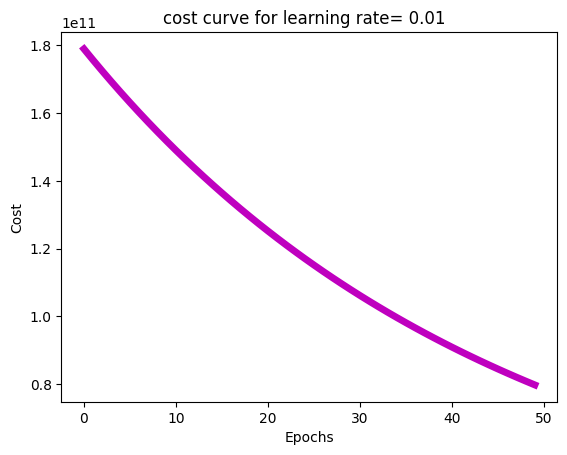



=== values for n_bed = 3, liv_area=2000, lot_area=8550 ==== 
df1.head():
    n_bed  liv_area  lot_area    h_price
0      3      2570      7242   538000.0
1      2       770     10000   180000.0
2      4      1960      5000   604000.0
3      3      1680      8080   510000.0
4      4      5420    101930  1230000.0
test_point after standarized [-0.5086379605860134, -0.11383911085656796, -0.21826227540368884]

Predicted y value for n_bed = 3, liv_area=2000, lot_area=8550  :  153551.7049690136


  ##    computing for lr : 0.1       ##
df1.head():
    n_bed  liv_area  lot_area    h_price
0      3      2570      7242   538000.0
1      2       770     10000   180000.0
2      4      1960      5000   604000.0
3      3      1680      8080   510000.0
4      4      5420    101930  1230000.0
df_normalize.head():
           0         1         2          3
0 -0.511226  0.551763 -0.307827   538000.0
1 -1.776512 -1.551968 -0.121316   180000.0
2  0.754059 -0.161168 -0.459444   604000.0
3 -0.511226 -0.

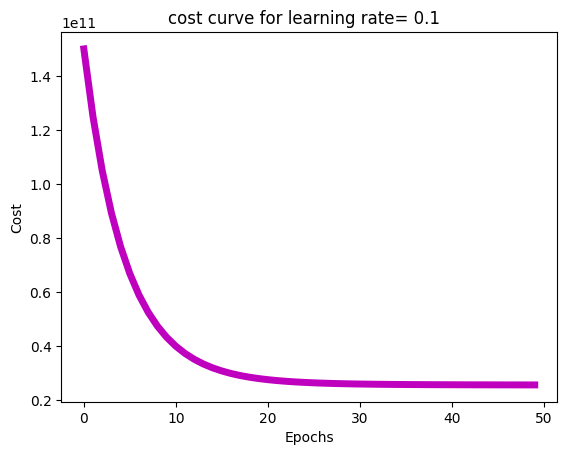



=== values for n_bed = 3, liv_area=2000, lot_area=8550 ==== 
df1.head():
    n_bed  liv_area  lot_area    h_price
0      3      2570      7242   538000.0
1      2       770     10000   180000.0
2      4      1960      5000   604000.0
3      3      1680      8080   510000.0
4      4      5420    101930  1230000.0
test_point after standarized [-0.5086379605860134, -0.11383911085656796, -0.21826227540368884]

Predicted y value for n_bed = 3, liv_area=2000, lot_area=8550  :  -10002.163703319246


  ##    computing for lr : 0.5       ##
df1.head():
    n_bed  liv_area  lot_area    h_price
0      3      2570      7242   538000.0
1      2       770     10000   180000.0
2      4      1960      5000   604000.0
3      3      1680      8080   510000.0
4      4      5420    101930  1230000.0
df_normalize.head():
           0         1         2          3
0 -0.511226  0.551763 -0.307827   538000.0
1 -1.776512 -1.551968 -0.121316   180000.0
2  0.754059 -0.161168 -0.459444   604000.0
3 -0.511226 -

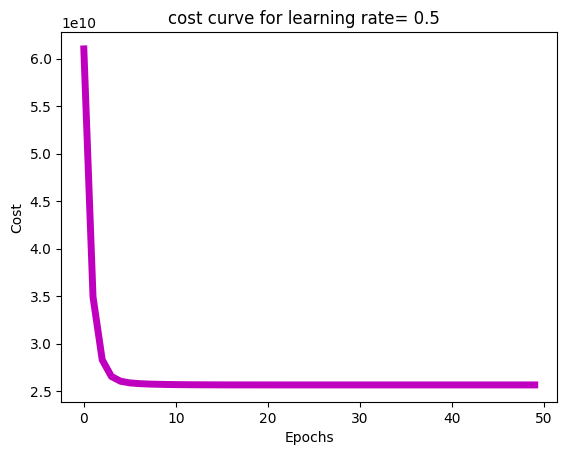



=== values for n_bed = 3, liv_area=2000, lot_area=8550 ==== 
df1.head():
    n_bed  liv_area  lot_area    h_price
0      3      2570      7242   538000.0
1      2       770     10000   180000.0
2      4      1960      5000   604000.0
3      3      1680      8080   510000.0
4      4      5420    101930  1230000.0
test_point after standarized [-0.5086379605860134, -0.11383911085656796, -0.21826227540368884]

Predicted y value for n_bed = 3, liv_area=2000, lot_area=8550  :  -35287.26952662078


  ##    computing for lr : 1.0       ##
df1.head():
    n_bed  liv_area  lot_area    h_price
0      3      2570      7242   538000.0
1      2       770     10000   180000.0
2      4      1960      5000   604000.0
3      3      1680      8080   510000.0
4      4      5420    101930  1230000.0
df_normalize.head():
           0         1         2          3
0 -0.511226  0.551763 -0.307827   538000.0
1 -1.776512 -1.551968 -0.121316   180000.0
2  0.754059 -0.161168 -0.459444   604000.0
3 -0.511226 -0

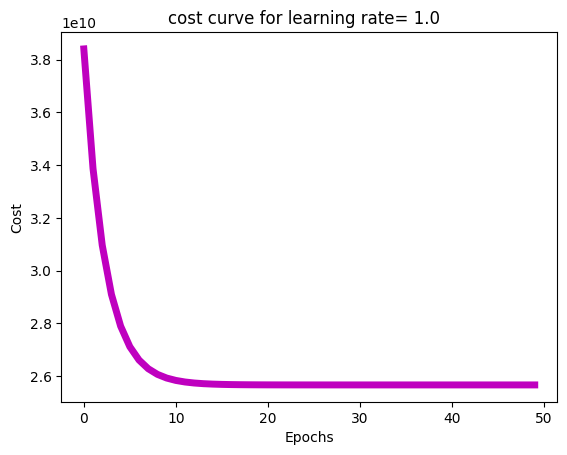



=== values for n_bed = 3, liv_area=2000, lot_area=8550 ==== 
df1.head():
    n_bed  liv_area  lot_area    h_price
0      3      2570      7242   538000.0
1      2       770     10000   180000.0
2      4      1960      5000   604000.0
3      3      1680      8080   510000.0
4      4      5420    101930  1230000.0
test_point after standarized [-0.5086379605860134, -0.11383911085656796, -0.21826227540368884]

Predicted y value for n_bed = 3, liv_area=2000, lot_area=8550  :  -35327.34106947171


  ##    computing for lr : 1.5       ##
df1.head():
    n_bed  liv_area  lot_area    h_price
0      3      2570      7242   538000.0
1      2       770     10000   180000.0
2      4      1960      5000   604000.0
3      3      1680      8080   510000.0
4      4      5420    101930  1230000.0
df_normalize.head():
           0         1         2          3
0 -0.511226  0.551763 -0.307827   538000.0
1 -1.776512 -1.551968 -0.121316   180000.0
2  0.754059 -0.161168 -0.459444   604000.0
3 -0.511226 -0

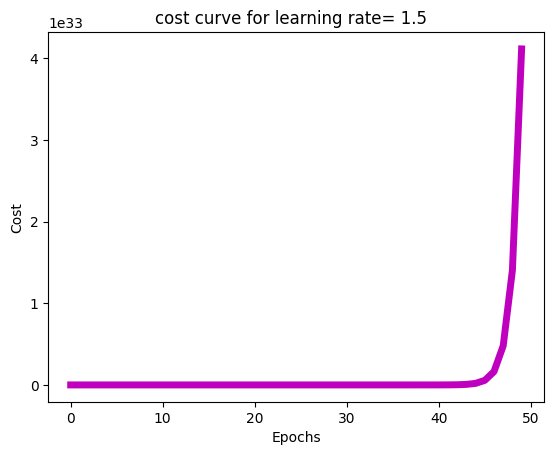



=== values for n_bed = 3, liv_area=2000, lot_area=8550 ==== 
df1.head():
    n_bed  liv_area  lot_area    h_price
0      3      2570      7242   538000.0
1      2       770     10000   180000.0
2      4      1960      5000   604000.0
3      3      1680      8080   510000.0
4      4      5420    101930  1230000.0
test_point after standarized [-0.5086379605860134, -0.11383911085656796, -0.21826227540368884]

Predicted y value for n_bed = 3, liv_area=2000, lot_area=8550  :  -3.19965868970862e+17


In [8]:
#%% for KCSmall2.csv
# learning_rate = 0.1
num_epochs = 50


def perform_linear_regression(lr):
    x, y = load_kc_multi_small2(filename)
    y = np.reshape(y, (99,1))
    x = np.hstack((np.ones((x.shape[0],1)), x))
    # theta = np.zeros((x.shape[1], 1))
    theta = np.zeros((x.shape[1], 1))
    
    # cost_function(-1, 20, theta)
    print("\n loss function value Jtheta for (0,0,0,0):")
    J_0000 = cost_function(x, y, theta= [[0],[0],[0],[0]])
    print("\nJ_0000 :", J_0000)
    
    theta, J_all = gradient_descent(x, y, theta, lr, num_epochs)

    J_theta = cost_function(x, y, theta)
    print("\nCost J_theta : ", J_theta)
    print("\nfinal theta : ", theta)
    
    test_and_plot_cost(J_all, lr)
    
    # =====================================
    #  n_bed = 3, liv_area=2000, lot_area=8550    
    # =====================================
    print("\n\n=== values for n_bed = 3, liv_area=2000, lot_area=8550 ==== ")
    test_point = pd.Series([3, 2000, 8550]).tolist()
    df1 = load_kc_multi_small2_df_without_normalization(filename)
    df1 = df1[["n_bed", "liv_area","lot_area"]]
    mean_series =df1.mean().tolist()
    std_series = df1.std().tolist()
    # print("mean values of df1:\n",mean_series)
    # print("std values of df1\n",std_series)
    test_point_standarized =calculate_standardized_value(test_point,mean_series, std_series )
    print("test_point after standarized", test_point_standarized)
    test_data_point = test_point_standarized 
    
    print("\nPredicted y value for n_bed = 3, liv_area=2000, lot_area=8550  : ",test(theta, test_data_point))
    # print("Predicted y value for x=7 : ",test(theta, [7]))

    # test(theta, [3.5])
    # test(theta, [7])
    
    

    
    
    # print("\n loss function value Jtheta for (-1,20):")
    # J2 = cost_function(x, y, theta= [[-1],[20]])


# lr_list = [0.01]
lr_list = [0.01, 0.1, 0.5, 1.0, 1.5]

for lr in lr_list:
    print(f"\n\n  ##    computing for lr : {lr}       ##")
    perform_linear_regression(lr)
